#Least-squares Fitting Tests and Linear Fitting

Currently having issues with how the scipy.optimize.curve_fit function is calculating the errors in the fit to hot and cool branches of the $\mathrm{EM}(T)$ curve. Errors seem to be too low, especially in the low $T_N$ cases where the fit is pretty bad for both the hot and the cool sides, especially the cool sides.

Let's create a few test cases and then try out the SciPy curve fitting procedure as well as a homebrewed one.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

##Case 1

First, let's try a superposition of a linear function with an oscillatory (sine wave) function and maybe add in some noise as well. Our function will look like $$f_1(x)=x + \sin{x} + \mathrm{noise}$$

In [116]:
def function_1(x,period,noise_level):
    linear = x
    oscillate = np.sin(period*x)
    np.random.seed()
    noise = noise_level*np.max(oscillate)*np.random.rand(len(x))
    return linear + oscillate + noise

In [137]:
x = np.linspace(0,2*np.pi,100)
y = function_1(x,5,0.75)

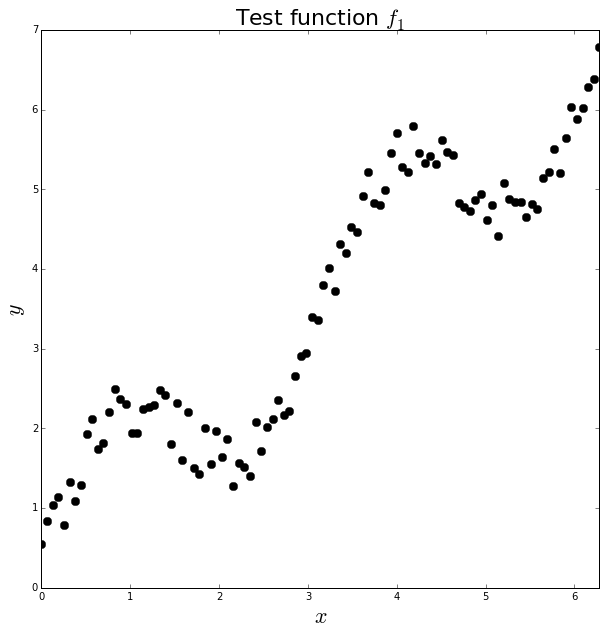

In [138]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_1$',fontsize=22)
plt.show()

Now, let's try to perform a linear fit to this function with the SciPy curve fitting function, using both a weighted and an unweighted approach.

In [139]:
def linear_fit(x,a,b):
    return a*x + b

In [140]:
pars,covar = curve_fit(linear_fit,x,y)

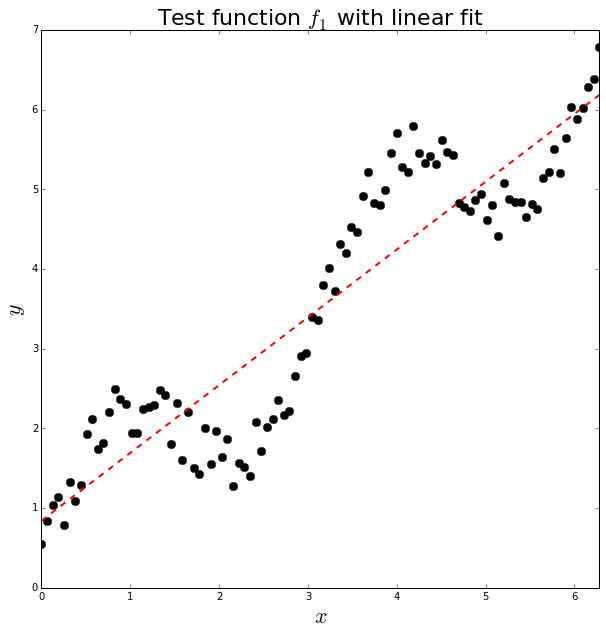

In [141]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.plot(x,pars[0]*x + pars[1],'r--',linewidth=2.0)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_1$ with linear fit',fontsize=22)
plt.show()

Now, what is the associated error with each of the fit parameters? Obviously, the curve (or at least the oscillatory part of it) is not well described by a linear function. Thus, our fit parameters should have a decent amount of uncertainty associated with them.

In [142]:
print("a_fit = %f, b_fit = %f"%(pars[0],pars[1]))
print("sigma_a = %f, sigma_b = %f"%(np.sqrt(np.diag(covar))[0],np.sqrt(np.diag(covar))[1]))

a_fit = 0.850301, b_fit = 0.842210
sigma_a = 0.037997, sigma_b = 0.138185


Next, let's use a Monte-Carlo approach to estimate the uncertainty at each point for our function.

In [143]:
y_mc = []
n_mc = 100
for i in range(n_mc):
    y_mc.append(function_1(x,5,0.75))
    
y_mean = np.mean(y_mc,axis=0)
y_sigma = np.std(y_mc,axis=0)

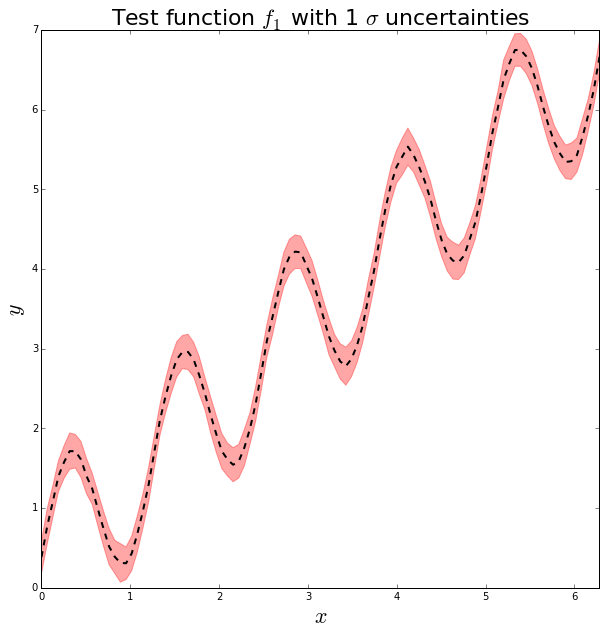

In [144]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.fill_between(x,y_mean - y_sigma,y_mean + y_sigma,facecolor='red',edgecolor='red',alpha=0.35)
ax.plot(x,y_mean,'k--',linewidth=2.0)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_1$ with 1 $\sigma$ uncertainties',fontsize=22)
plt.show()

Next, we'll perform a linear to this function using the 1 $\sigma$ uncertainties generated using our MC method.

In [145]:
pars,covar = curve_fit(linear_fit,x,y_mean,sigma=y_sigma,absolute_sigma=True)

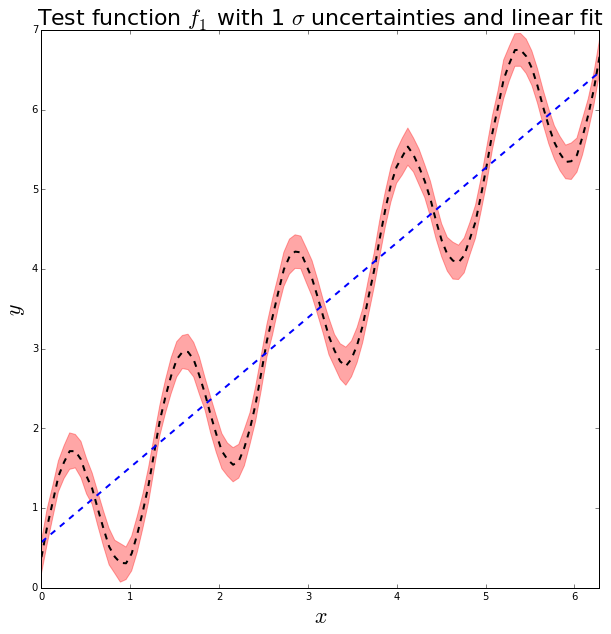

In [146]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.fill_between(x,y_mean - y_sigma,y_mean + y_sigma,facecolor='red',edgecolor='red',alpha=0.35)
ax.plot(x,y_mean,'k--',linewidth=2.0)
ax.plot(x,pars[0]*x + pars[1],'b--',linewidth=2.0)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_1$ with 1 $\sigma$ uncertainties and linear fit',fontsize=22)
plt.show()

Is there any difference between the fit uncertainties/errors when we use the $\sigma$ weights and when we don't?

In [147]:
print("a_fit = %f, b_fit = %f"%(pars[0],pars[1]))
print("sigma_a = %f, sigma_b = %f"%(np.sqrt(np.diag(covar))[0],np.sqrt(np.diag(covar))[1]))

a_fit = 0.938540, b_fit = 0.573454
sigma_a = 0.011667, sigma_b = 0.042418


##Case 2

In [131]:
def function_2(x,b,noise_level):
    np.random.rand()
    return -x**2 + b*x + noise_level*b*np.random.rand(len(x))

In [132]:
x = np.linspace(0,10,100)
y = function_2(x,20,0.5)

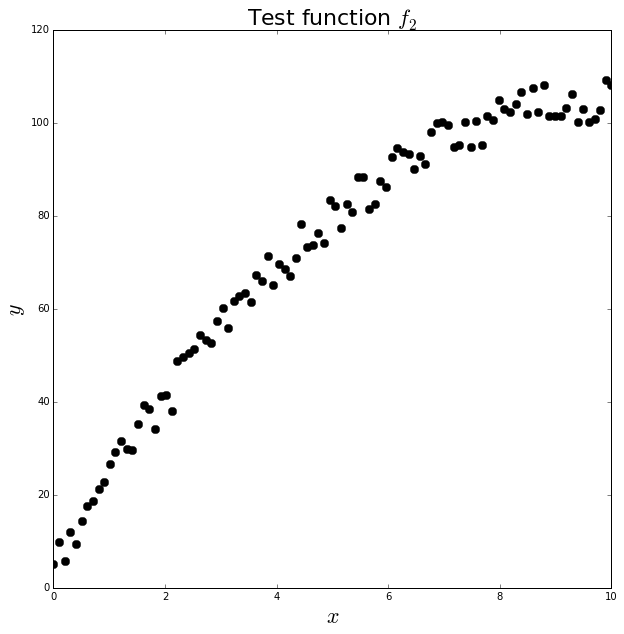

In [133]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_2$',fontsize=22)
plt.show()

Now, let's again do a linear fit to the function.

In [134]:
pars,covar = curve_fit(linear_fit,x,y)

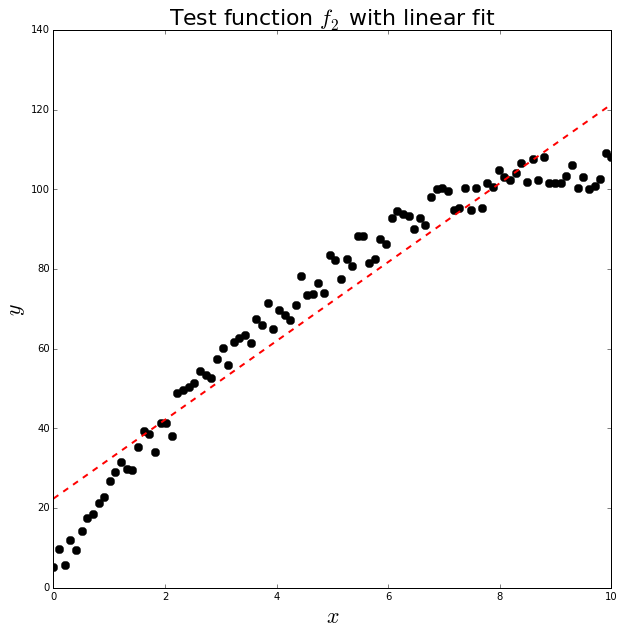

In [135]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.plot(x,pars[0]*x + pars[1],'r--',linewidth=2.0)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_2$ with linear fit',fontsize=22)
plt.show()

In [136]:
print("a_fit = %f, b_fit = %f"%(pars[0],pars[1]))
print("sigma_a = %f, sigma_b = %f"%(np.sqrt(np.diag(covar))[0],np.sqrt(np.diag(covar))[1]))

a_fit = 9.893900, b_fit = 22.377479
sigma_a = 0.284189, sigma_b = 1.644903


Again, let's try our MC approach for this function as well.

In [148]:
y_mc = []
n_mc = 1000
for i in range(n_mc):
    y_mc.append(function_2(x,20,0.5))
    
y_mean = np.mean(y_mc,axis=0)
y_sigma = np.std(y_mc,axis=0)

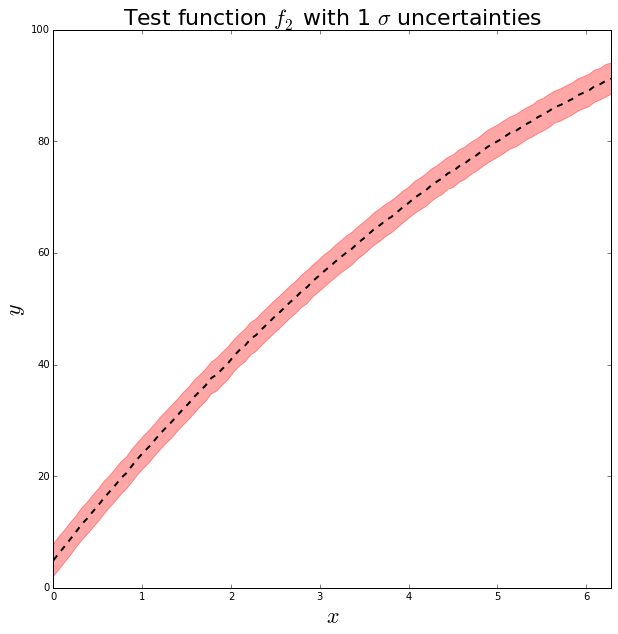

In [151]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.fill_between(x,y_mean - y_sigma,y_mean + y_sigma,facecolor='red',edgecolor='red',alpha=0.35)
ax.plot(x,y_mean,'k--',linewidth=2.0)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_2$ with 1 $\sigma$ uncertainties',fontsize=22)
plt.show()

In [152]:
pars,covar = curve_fit(linear_fit,x,y_mean,sigma=y_sigma,absolute_sigma=True)

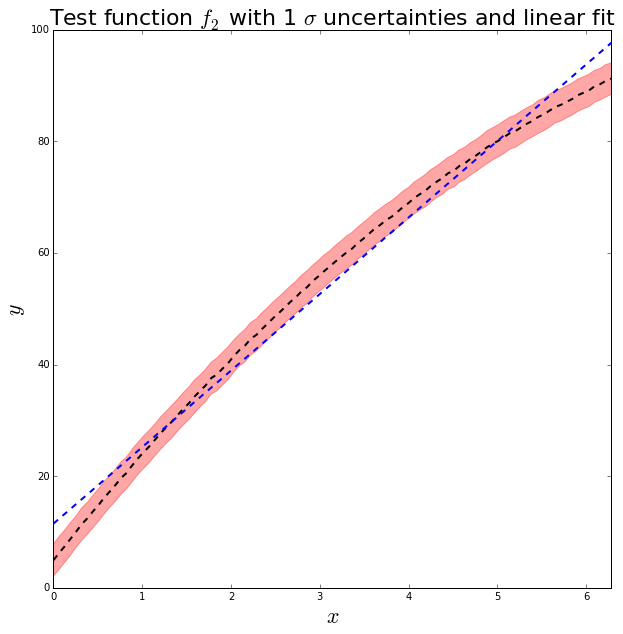

In [153]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.fill_between(x,y_mean - y_sigma,y_mean + y_sigma,facecolor='red',edgecolor='red',alpha=0.35)
ax.plot(x,y_mean,'k--',linewidth=2.0)
ax.plot(x,pars[0]*x + pars[1],'b--',linewidth=2.0)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_2$ with 1 $\sigma$ uncertainties and linear fit',fontsize=22)
plt.show()

In [154]:
print("a_fit = %f, b_fit = %f"%(pars[0],pars[1]))
print("sigma_a = %f, sigma_b = %f"%(np.sqrt(np.diag(covar))[0],np.sqrt(np.diag(covar))[1]))

a_fit = 13.717679, b_fit = 11.501079
sigma_a = 0.157856, sigma_b = 0.575028


##Case 3

Finally, let's try to do a linear fit to some function that has no linear component at all.

In [188]:
def function_3(x,noise_level):
    np.random.seed()
    return noise_level*np.random.rand(len(x)) - x**3 - 2*x**2

In [191]:
x = np.linspace(-2,1,100)
y = function_3(x,0.2)

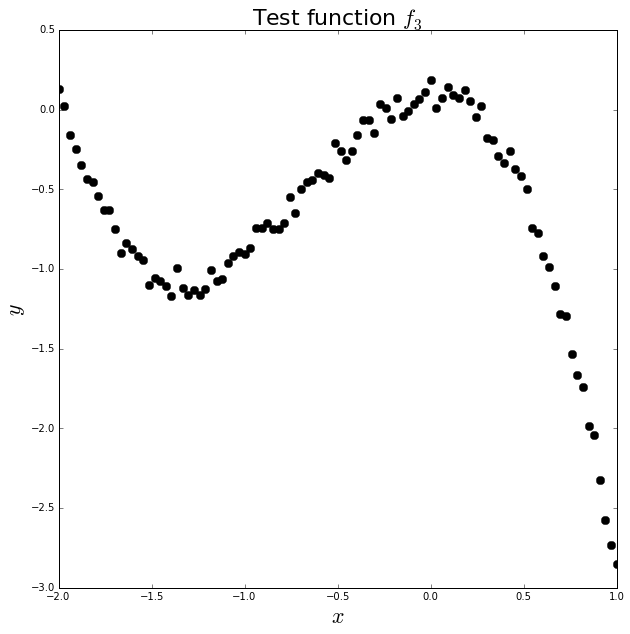

In [192]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_3$',fontsize=22)
plt.show()

We'll select a region on this plot that is roughly linear by inspection.

In [204]:
y_linear = y[(x>-1.5) & (x<0.25)]
x_linear = x[(x>-1.5) & (x<0.25)]

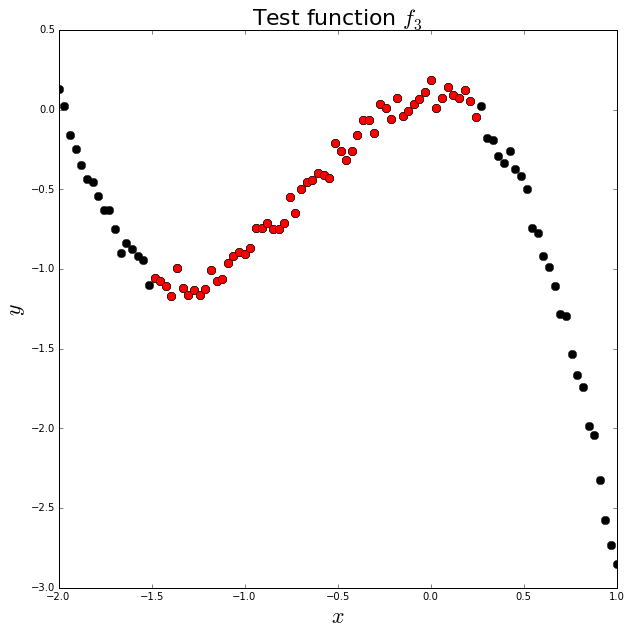

In [205]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.plot(x_linear,y_linear,'ro',markersize=8)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_3$',fontsize=22)
plt.show()

Now, we'll fit to this roughly linear section using the same function as before.

In [206]:
pars,covar = curve_fit(linear_fit,x_linear,y_linear)

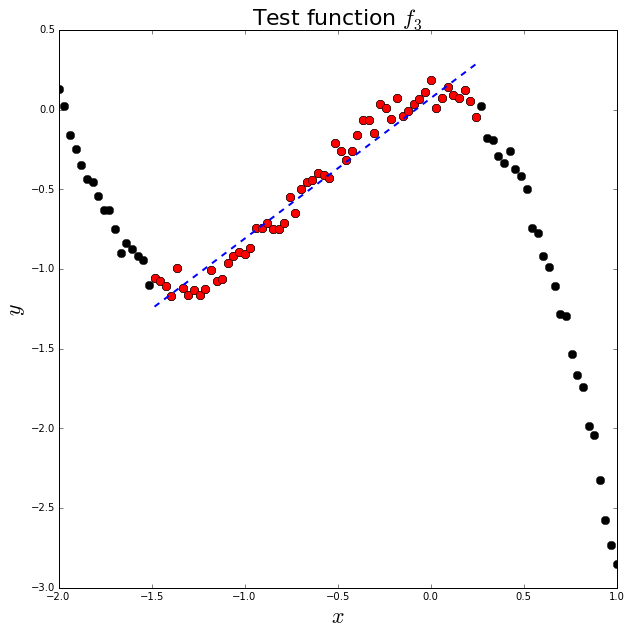

In [207]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.plot(x,y,'ko',markersize=8)
ax.plot(x_linear,y_linear,'ro',markersize=8)
ax.plot(x_linear,pars[0]*x_linear + pars[1],'b--',linewidth=2)
ax.set_xlim([np.min(x),np.max(x)])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_title(r'Test function $f_3$',fontsize=22)
plt.show()

In [209]:
print("a_fit = %f, b_fit = %f"%(pars[0],pars[1]))
print("sigma_a = %f, sigma_b = %f"%(np.sqrt(np.diag(covar))[0]/pars[0],np.sqrt(np.diag(covar))[1]/pars[1]))

a_fit = 0.880361, b_fit = 0.070761
sigma_a = 0.032139, sigma_b = 0.320692
